# Explore here

In [13]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
df.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [17]:
X = df[['Latitude', 'Longitude', 'MedInc']]

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)


In [21]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,n_init='auto', random_state = 42)
model.fit(X_train)


KMeans(n_clusters=6, n_init='auto', random_state=42)

In [23]:
X_train['cluster']=list(model.labels_)
X_train.head()

,Latitude,Longitude,MedInc,cluster
14196,32.71,-117.03,3.2596,3
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,1
14265,32.69,-117.11,1.9425,3
2271,36.78,-119.80,3.5542,5


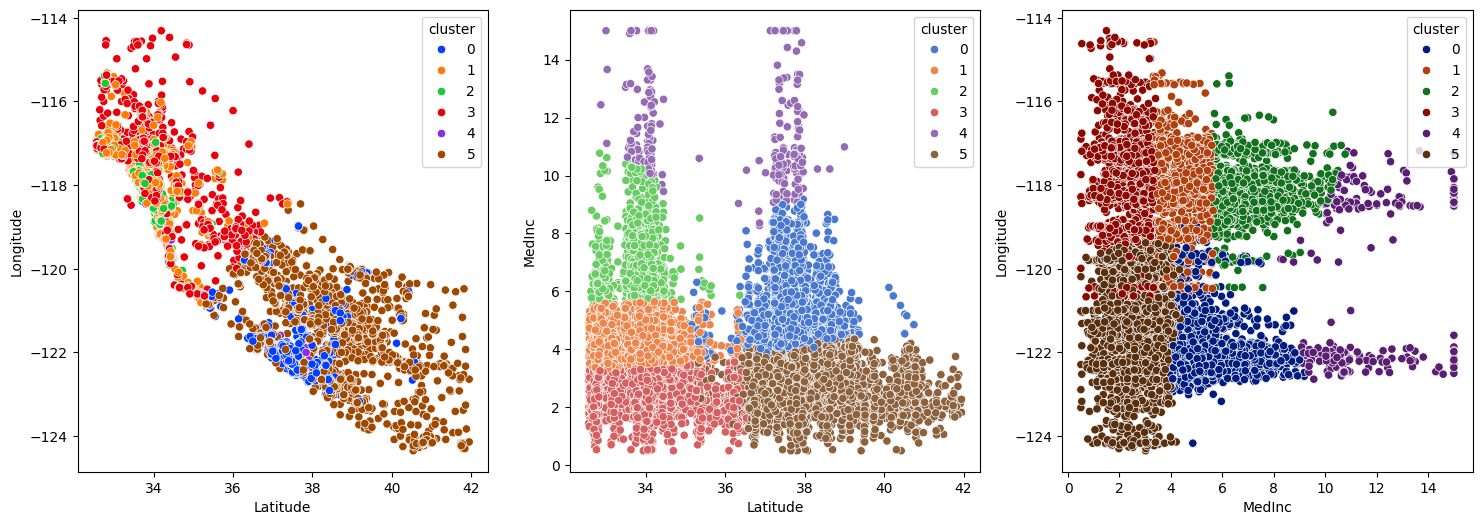

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axis = plt.subplots(1,3,figsize=(18,6))

sns.scatterplot(ax=axis[0],data=X_train,x='Latitude',y='Longitude',hue='cluster', palette ='bright')
sns.scatterplot(ax=axis[1],data=X_train,x='Latitude',y='MedInc',hue='cluster', palette ='muted')
sns.scatterplot(ax=axis[2],data=X_train,x='MedInc',y='Longitude',hue='cluster', palette ='dark')
plt.show()

In [28]:
X_test['cluster']= list(model.predict(X_test))
X_test.head()

,Latitude,Longitude,MedInc,cluster
20046,36.06,-119.01,1.6812,3
3024,35.14,-119.46,2.5313,3
15663,37.80,-122.44,3.4801,5
20484,34.28,-118.72,5.7376,2
9814,36.62,-121.93,3.7250,5


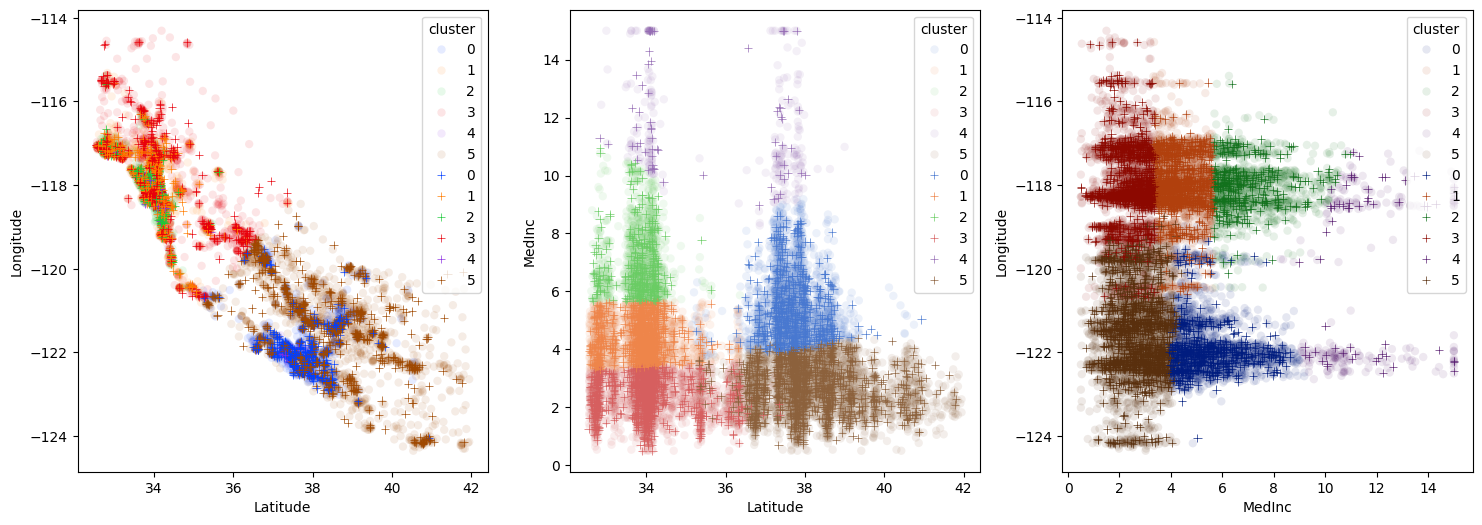

In [31]:
fig,axis = plt.subplots(1,3,figsize=(18,6))

sns.scatterplot(ax=axis[0],data=X_train,x='Latitude',y='Longitude',hue='cluster', palette ='bright',alpha=0.1 )
sns.scatterplot(ax=axis[1],data=X_train,x='Latitude',y='MedInc',hue='cluster', palette ='muted',alpha=0.1 )
sns.scatterplot(ax=axis[2],data=X_train,x='MedInc',y='Longitude',hue='cluster', palette ='dark',alpha=0.1)

sns.scatterplot(ax=axis[0],data=X_test,x='Latitude',y='Longitude',hue='cluster', palette ='bright', marker='+')
sns.scatterplot(ax=axis[1],data=X_test,x='Latitude',y='MedInc',hue='cluster', palette ='muted', marker='+')
sns.scatterplot(ax=axis[2],data=X_test,x='MedInc',y='Longitude',hue='cluster', palette ='dark', marker='+')



plt.show()

In [32]:
from sklearn.tree import DecisionTreeClassifier
y_train = X_train['cluster']
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train.drop(columns=['cluster']),y_train)

DecisionTreeClassifier(random_state=42)

In [36]:
y_pred = model2.predict(X_test.drop(columns='cluster'))
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(X_test['cluster'],y_pred)

0.9941860465116279

In [38]:
from pickle import dump
dump(model,open('../models/k-means_6_42.sav','wb'))
dump(model2,open('../models/decisiontree_default_42.model','wb'))